In [7]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download latest version
path = kagglehub.dataset_download("sooyoungher/smoking-drinking-dataset")
print("Path to dataset files:", path)

file_name = "smoking_driking_dataset_Ver01.csv"
file_path = f"{path}/{file_name}"
dataset = pd.read_csv(file_path)

In [5]:
# Analisi iniziale del dataset
print("\nPrime righe del dataset:")
print(dataset.head())

print("\nDimensioni del dataset:")
print(dataset.shape)

print("\nTipi di dati:")
print(dataset.info())

print("\nStatistiche descrittive di base:")
print(dataset.describe())



Prime righe del dataset:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_cre

### Prime considerazioni

I dati sembrano non contenere dati nulli o NaN, però si osserva facilmente che per alcune feature ci sono dei dati che sembrano essere irrealistici (Es.: per la feature **waistline** la media risulta essere _81_, il 4° quartile _87_ e il valore massimo _999_); quindi nonostante la non presenza di valori nulli, bisogna verificare se sono presenti valori mancanti codificati in altro modo.

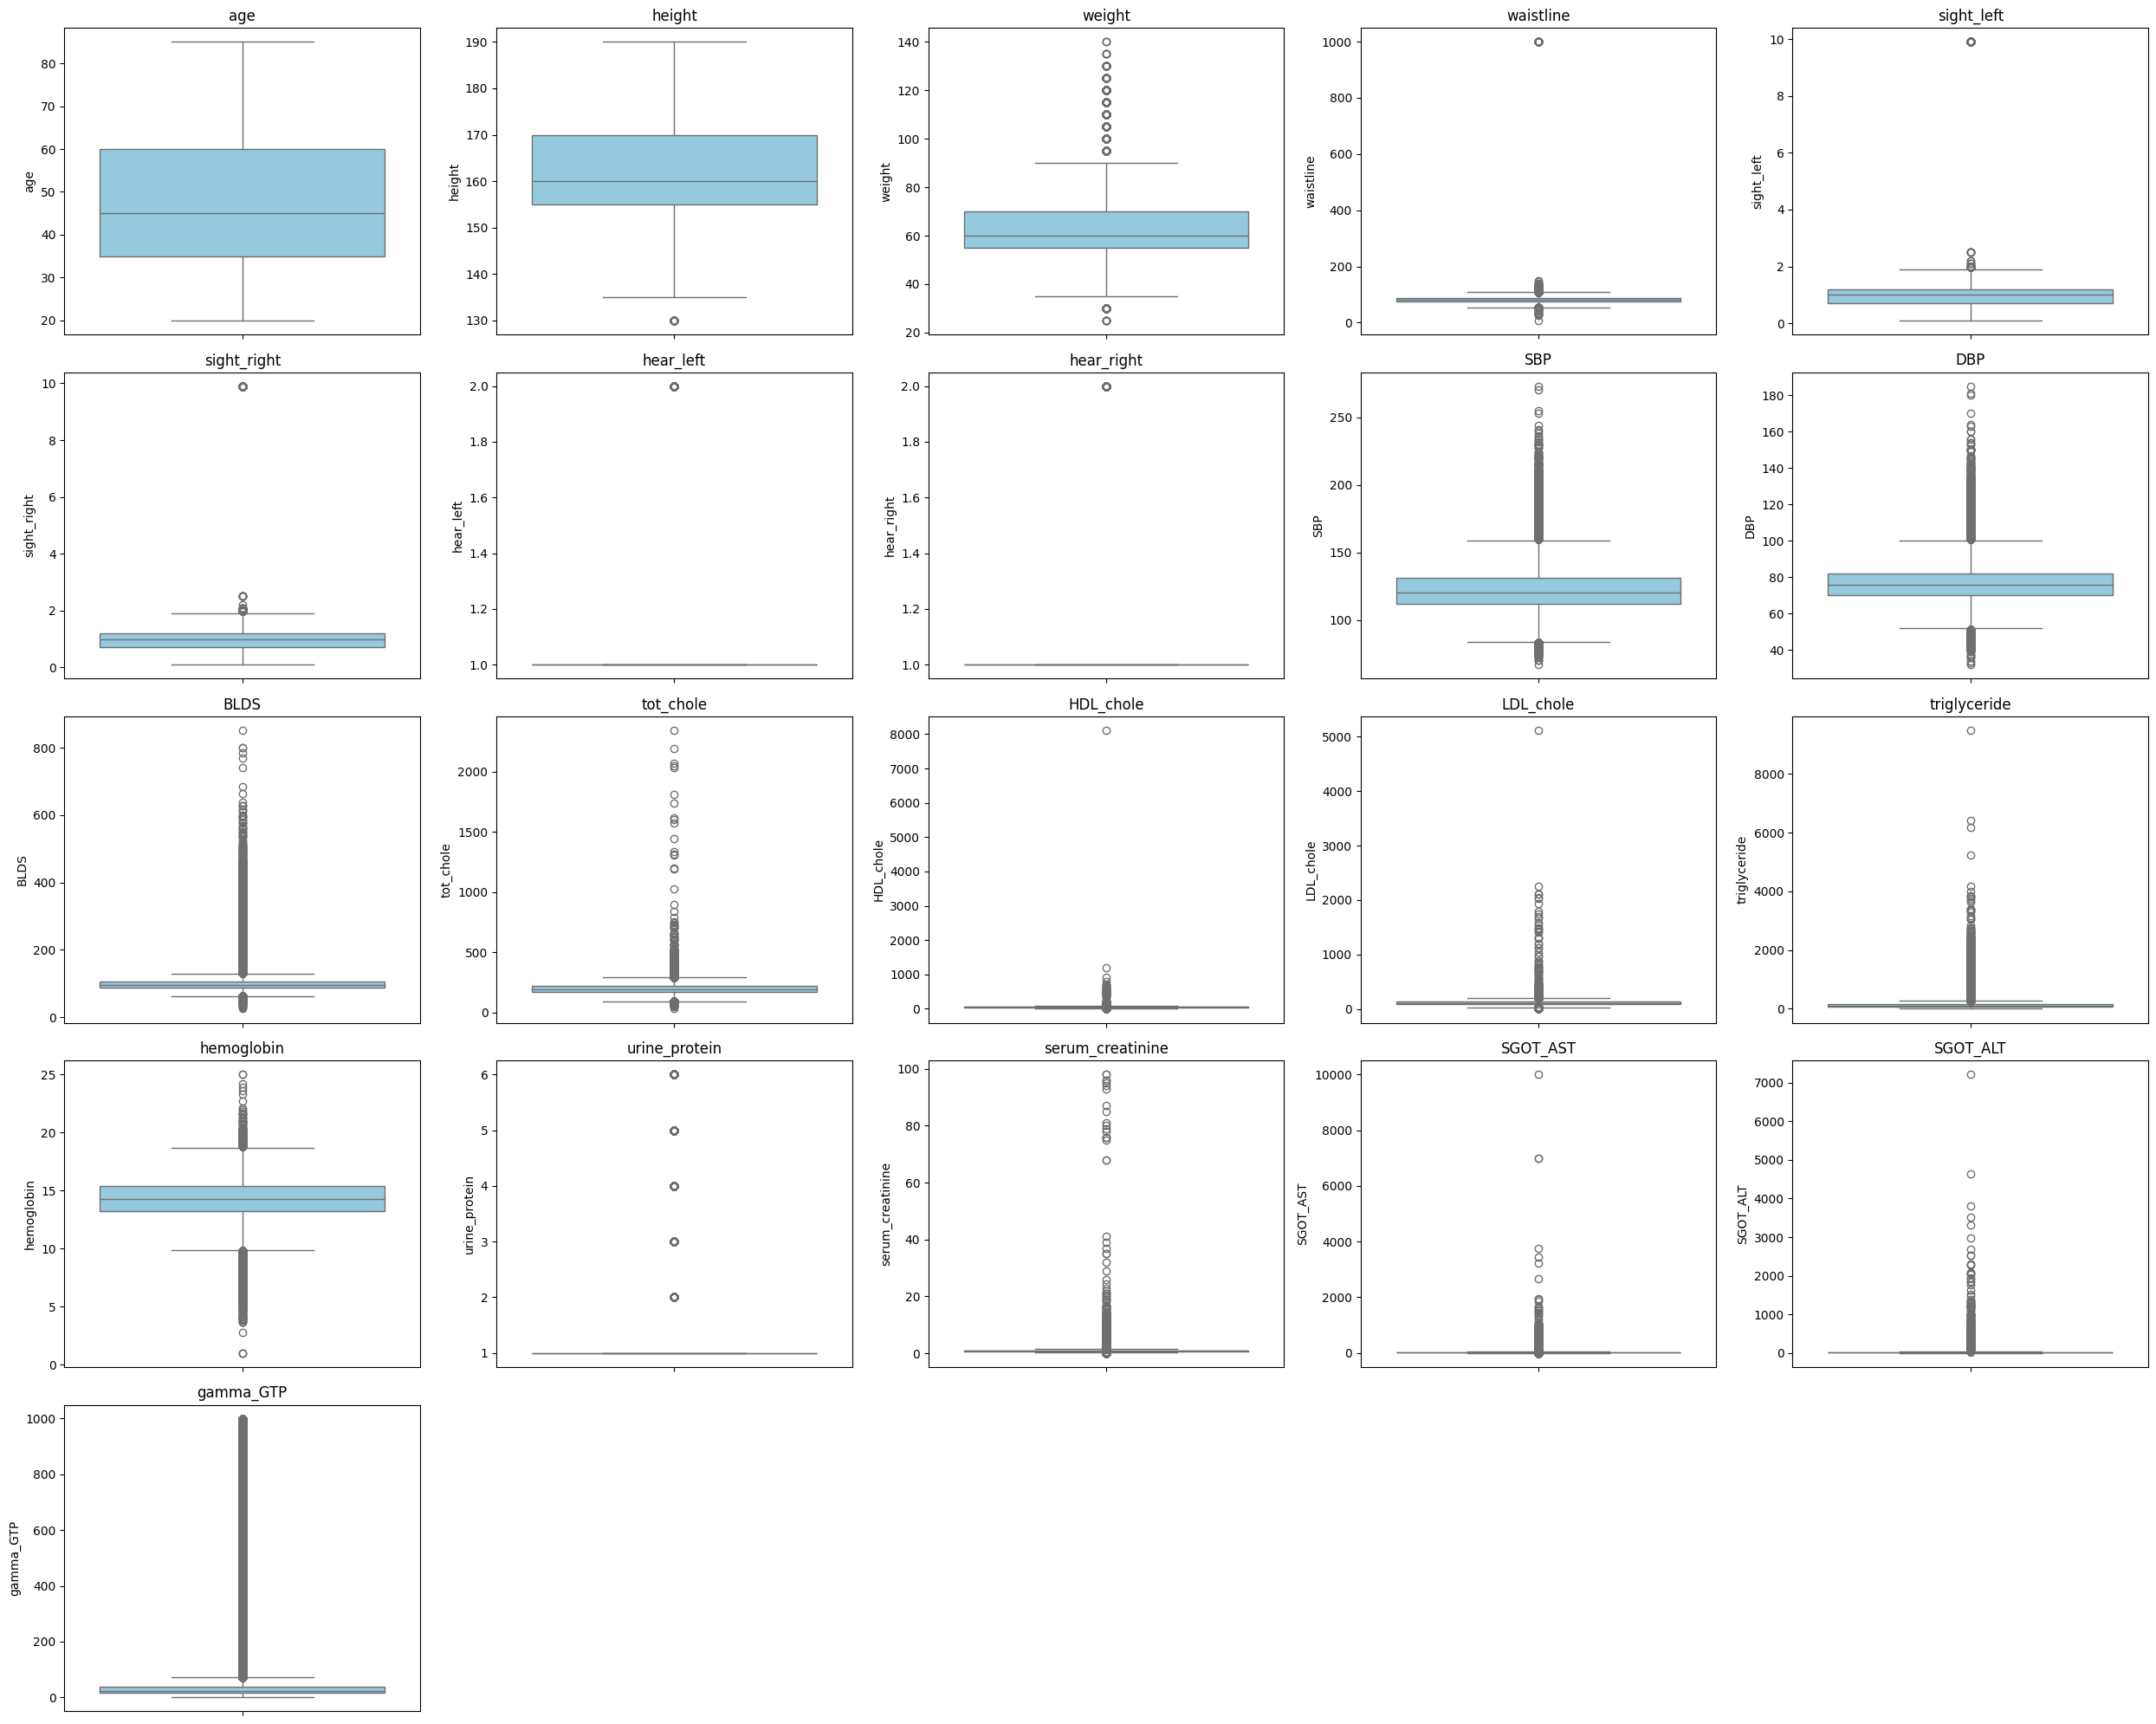

In [47]:
dataset_mod = dataset.drop(columns=["sex", "SMK_stat_type_cd", "DRK_YN"])

# Boxplot per le principali feature numeriche
plt.figure(figsize=(25, 20))
for i, col in enumerate(dataset_mod.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=dataset[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()
plt.show()

/var/folders/9k/0zc4z1md49d58jhbq4fgqjg40000gn/T/ipykernel_3765/130918406.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smk_distribution.index, y=smk_distribution.values, palette="Blues_d")
/var/folders/9k/0zc4z1md49d58jhbq4fgqjg40000gn/T/ipykernel_3765/130918406.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drk_distribution.index, y=drk_distribution.values, palette="Greens_d")


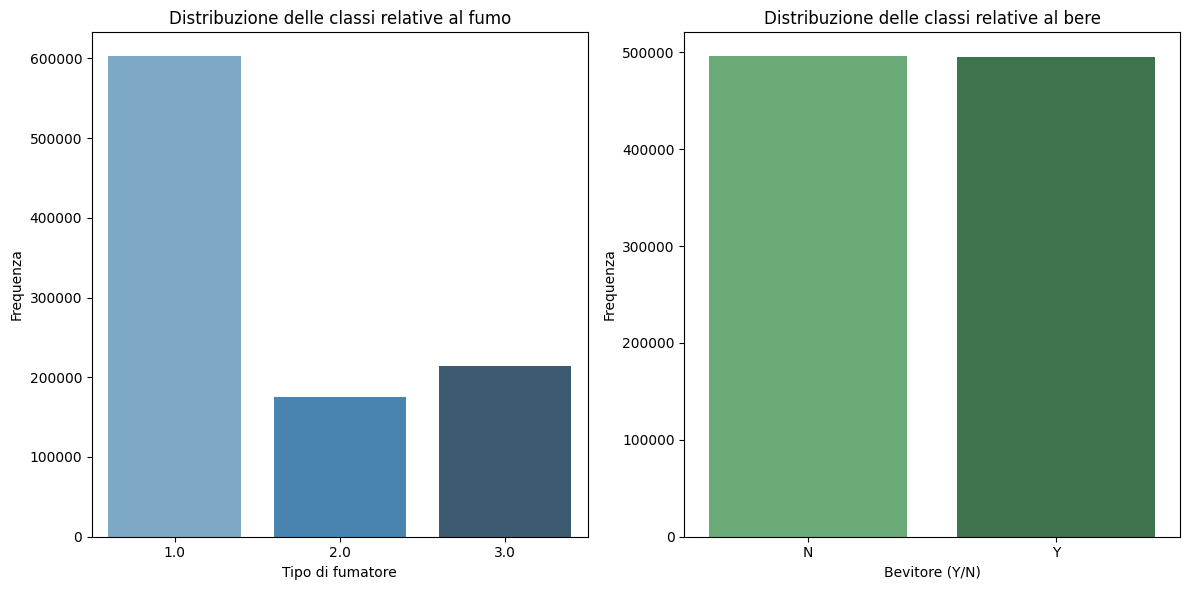

In [48]:
smk_distribution = dataset["SMK_stat_type_cd"].value_counts()
drk_distribution = dataset["DRK_YN"].value_counts()

# Distribuzione SMK_stat_type_cd
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Num righe, num colonne, posizione 
sns.barplot(x=smk_distribution.index, y=smk_distribution.values, palette="Blues_d")
plt.title("Distribuzione delle classi relative al fumo")
plt.xlabel("Tipo di fumatore")
plt.ylabel("Frequenza")

# Distribuzione DRK_YN
plt.subplot(1, 2, 2)
sns.barplot(x=drk_distribution.index, y=drk_distribution.values, palette="Greens_d")
plt.title("Distribuzione delle classi relative al bere")
plt.xlabel("Bevitore (Y/N)")
plt.ylabel("Frequenza")

plt.tight_layout()
plt.show()

In [51]:
# Controllo valori massimi e distanza dal secondo massimo
max_analysis = {}

for col in dataset_mod.columns:
    # Valore massimo e occorrenze
    max_value = dataset_mod[col].max()
    max_count = (dataset_mod[col] == max_value).sum()
    
    # Secondo valore più grande
    second_max_value = dataset_mod[col][dataset_mod[col] < max_value].max()
    distance = max_value - second_max_value if pd.notnull(second_max_value) else None
    mean_value = dataset[col].mean()
    distance_mean = max_value - mean_value

    # Salva risultati
    max_analysis[col] = {
        "max_value": max_value,
        "max_count": max_count,
        "second_max_value": second_max_value,
        "distance": distance,
        "mean_value": mean_value,
        "distance_mean": distance_mean 
    }

# Stampa risultati
for col, info in max_analysis.items():
    print(f"Colonna: {col}")
    print(f"  Valore massimo: {info['max_value']}")
    print(f"  Occorrenze del massimo: {info['max_count']}")
    print(f"  Secondo massimo: {info['second_max_value']}")
    print(f"  Distanza tra massimo e secondo massimo: {info['distance']}")
    print(f"  Media: {info['mean_value']}")
    print(f"  Distanza tra massimo e media: {info['distance_mean']}")
    print()


Colonna: age
  Valore massimo: 85
  Occorrenze del massimo: 3291
  Secondo massimo: 80
  Distanza tra massimo e secondo massimo: 5
  Media: 47.614490803412735
  Distanza tra massimo e media: 37.385509196587265

Colonna: height
  Valore massimo: 190
  Occorrenze del massimo: 363
  Secondo massimo: 185
  Distanza tra massimo e secondo massimo: 5
  Media: 162.24062537196903
  Distanza tra massimo e media: 27.75937462803097

Colonna: weight
  Valore massimo: 140
  Occorrenze del massimo: 3
  Secondo massimo: 135
  Distanza tra massimo e secondo massimo: 5
  Media: 63.28405017017268
  Distanza tra massimo e media: 76.71594982982732

Colonna: waistline
  Valore massimo: 999.0
  Occorrenze del massimo: 57
  Secondo massimo: 149.1
  Distanza tra massimo e secondo massimo: 849.9
  Media: 81.23335777821268
  Distanza tra massimo e media: 917.7666422217874

Colonna: sight_left
  Valore massimo: 9.9
  Occorrenze del massimo: 3118
  Secondo massimo: 2.5
  Distanza tra massimo e secondo massimo: 7.4

In [52]:
# Identificazione dei valori "fuori scala" basati sull'IQR
outlier_info = {}

for col in dataset_mod.columns:
    Q1 = dataset_mod[col].quantile(0.25)
    Q3 = dataset_mod[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrare valori fuori scala
    outliers = dataset_mod[(dataset_mod[col] < lower_bound) | (dataset_mod[col] > upper_bound)]
    outlier_info[col] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "examples": outliers[col].head(5).tolist()  # Prime righe con outlier
    }

# Mostra risultati
for col, info in outlier_info.items():
    print(f"Colonna: {col}")
    print(f"  Valori fuori scala: {info['num_outliers']}")
    print(f"  Limiti: {info['lower_bound']} - {info['upper_bound']}")
    print(f"  Esempi di outlier: {info['examples']}")
    print()


Colonna: age
  Valori fuori scala: 0
  Limiti: -2.5 - 97.5
  Esempi di outlier: []

Colonna: height
  Valori fuori scala: 86
  Limiti: 132.5 - 192.5
  Esempi di outlier: [130, 130, 130, 130, 130]

Colonna: weight
  Valori fuori scala: 19221
  Limiti: 32.5 - 92.5
  Esempi di outlier: [95, 120, 95, 105, 100]

Colonna: waistline
  Valori fuori scala: 4417
  Limiti: 53.54999999999999 - 108.35
  Esempi di outlier: [110.0, 109.0, 110.0, 114.0, 110.8]

Colonna: sight_left
  Valori fuori scala: 11582
  Limiti: -0.050000000000000044 - 1.95
  Esempi di outlier: [9.9, 2.0, 2.0, 2.0, 9.9]

Colonna: sight_right
  Valori fuori scala: 10495
  Limiti: -0.050000000000000044 - 1.95
  Esempi di outlier: [9.9, 9.9, 2.0, 9.9, 9.9]

Colonna: hear_left
  Valori fuori scala: 31222
  Limiti: 1.0 - 1.0
  Esempi di outlier: [2.0, 2.0, 2.0, 2.0, 2.0]

Colonna: hear_right
  Valori fuori scala: 30212
  Limiti: 1.0 - 1.0
  Esempi di outlier: [2.0, 2.0, 2.0, 2.0, 2.0]

Colonna: SBP
  Valori fuori scala: 15836
  Limit